### Importing the dataset

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('paysim.csv')

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
#checking for null values
data.isnull().values.any()
count_type = data.type.value_counts()
count_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### A bit of data visulalisation

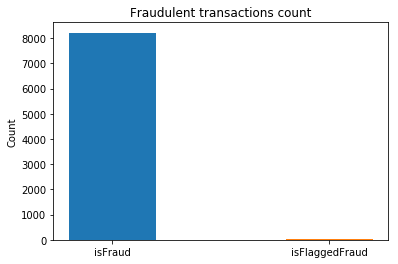

In [8]:
# Finding the number of rows of the dataset 
r_len = len(data.index)

# count the number of rows with value 1 in isFlaggedFraud vs isFraud
count_fraud = data['isFraud'].value_counts()
count_detection = data['isFlaggedFraud'].value_counts()


#Visualisation
labels = ['isFraud','isFlaggedFraud']
plt.bar([1],count_fraud[1], width = 0.4)
plt.bar([2],count_detection[1],width = 0.4)
plt.ylabel('Count')
plt.title('Fraudulent transactions count')
plt.xticks([1,2], labels)
plt.show()
    

In [15]:
#checking fradulent transaction for each type of payments

count_payment = data.loc[(data.isFraud == 1) & (data.type == 'PAYMENT')]

count_transfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]

count_cashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

count_debit = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')]

count_cashin = data.loc[(data.isFraud == 1) & (data.type == 'CASH_IN')]

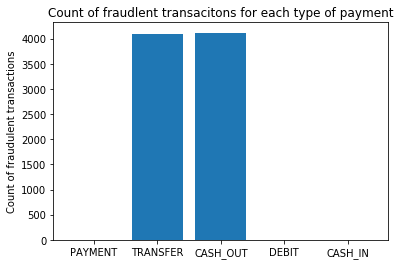

In [17]:
#Visualisation of all types of payments for number of frauds

labels = ['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN']
plt.bar([1,2,3,4,5],[len(count_payment),len(count_transfer), len(count_cashout), len(count_debit), len(count_cashin)])
plt.ylabel('Count of fraudulent transactions')
plt.title('Count of fraudlent transacitons for each type of payment')
plt.xticks([1,2,3,4,5], labels)
plt.show()


As we can see only transfer and cashout type of payments are mostly responsible for the fraudlent transactions

Checking for mutiple customer transactions to find the fradulent ones

In [38]:
count_fraud = data.loc[(data['isFraud'] == 1) ]
count_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [35]:

count_nameOrig = count_fraud['nameOrig'].value_counts()
count_nameOrig.sort_values(ascending = False)
count_nameOrig.head()

C1873532764    1
C1583865151    1
C709213920     1
C1008040846    1
C1236485428    1
Name: nameOrig, dtype: int64

Checking the despostied ones for repeated fradulent transactions 

In [41]:
count_nameDest = count_fraud['nameDest'].value_counts()
count_nameDest.sort_values(ascending = False)
count_nameDest.head()

C1460854172    2
C1827800010    2
C643624257     2
C14138104      2
C1669818195    2
Name: nameDest, dtype: int64

From the above observations we can see that there are some repeat offenders in the depositor side 